In [5]:
import pandas as pd
import random
import numpy as np
import requests
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key



In [2]:
lats=np.random.randint(-90,90,200)
lngs=np.random.randint(-180,180,400)

In [3]:
locations=[]
cities=[]
countries=[]
counts=0
for x in range(0,1550):
    if counts<=700:
        locations.append((random.choice(lats),random.choice(lngs)))
        for location in locations:
            city = citipy.nearest_city(location[0],location[1])
            city.city_name
            if city.city_name not in cities:
                counts+=1
                cities.append(city.city_name)
                countries.append(city.country_code)

In [6]:
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Date=[]
good_cities=[]
good_lats=[]
good_lngs=[]
good_countries=[]
id=0
for city in cities:
    id+=1
    print(f"processing Record {id}|{city}")
    response=requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}").json()
    if response['cod']!='404':
        good_cities.append(city)
        good_lats.append(response['coord']['lat'])
        good_lngs.append(response['coord']['lon'])
        good_countries.append(response['sys']['country'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Date.append(response['dt'])  
    else:
        print("City not found. skipping...")



processing Record 1|la ronge
processing Record 2|puerto ayora
processing Record 3|mayumba
processing Record 4|husavik
processing Record 5|avarua
processing Record 6|saldanha
processing Record 7|westport
processing Record 8|atuona
processing Record 9|bluff
processing Record 10|tasiilaq
processing Record 11|faya
processing Record 12|mataura
processing Record 13|beyneu
processing Record 14|rolim de moura
City not found. skipping...
processing Record 15|barrow
processing Record 16|ribeira grande
processing Record 17|roald
processing Record 18|saleaula
City not found. skipping...
processing Record 19|punta arenas
processing Record 20|ruatoria
City not found. skipping...
processing Record 21|ushuaia
processing Record 22|taolanaro
City not found. skipping...
processing Record 23|vaini
processing Record 24|dickinson
processing Record 25|libenge
processing Record 26|lebu
processing Record 27|namibe
processing Record 28|mar del plata
processing Record 29|saint anthony
processing Record 30|zhigan

processing Record 252|sentyabrskiy
City not found. skipping...
processing Record 253|san luis
processing Record 254|abaza
processing Record 255|anloga
processing Record 256|san jeronimo
processing Record 257|dongsheng
processing Record 258|samusu
City not found. skipping...
processing Record 259|kazachinskoye
processing Record 260|shchuchye
City not found. skipping...
processing Record 261|ust-nera
processing Record 262|macau
processing Record 263|margherita
processing Record 264|birao
processing Record 265|lolua
City not found. skipping...
processing Record 266|tuyen quang
processing Record 267|venado tuerto
processing Record 268|berezovyy
processing Record 269|kloulklubed
processing Record 270|mandalgovi
processing Record 271|mattru
processing Record 272|khasan
processing Record 273|asau
processing Record 274|riberalta
processing Record 275|karratha
processing Record 276|tchibanga
processing Record 277|dawlatabad
processing Record 278|key west
processing Record 279|polonnaruwa
proces

processing Record 493|anadyr
processing Record 494|mathbaria
processing Record 495|terrace
processing Record 496|zhezkazgan
processing Record 497|tungkang
City not found. skipping...
processing Record 498|gizo
processing Record 499|sao joao da barra
processing Record 500|kahului
processing Record 501|dalvik
processing Record 502|madison
processing Record 503|belaya gora
processing Record 504|margate
processing Record 505|griffith
processing Record 506|kayerkan
processing Record 507|tabou
processing Record 508|chara
processing Record 509|dolores
processing Record 510|urubicha
processing Record 511|hazleton
processing Record 512|padang
processing Record 513|saint-pierre
processing Record 514|swellendam
processing Record 515|guerrero negro
processing Record 516|lodja
processing Record 517|bacalar
processing Record 518|rochegda
processing Record 519|buala
processing Record 520|lagoa
processing Record 521|portland
processing Record 522|bose
processing Record 523|andra
processing Record 524|

In [7]:
df=pd.DataFrame({'City':good_cities,
                'Lat':good_lats,
               'Lng':good_lngs,
               'Max Temp':Max_Temp,
               'Humidity':Humidity,
               'Cloudiness':Cloudiness,
               'Wind Speed':Wind_Speed,
                 'Country':good_countries,
               'Date':Date})
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la ronge,55.1001,-105.2842,56.53,75,91,6.93,CA,1627560656
1,puerto ayora,-0.7393,-90.3518,71.15,87,70,6.91,EC,1627560657
2,mayumba,-3.4320,10.6554,77.27,73,14,9.33,GA,1627560657
3,husavik,66.0449,-17.3389,49.73,96,100,3.04,IS,1627560658
4,avarua,-21.2078,-159.7750,69.85,88,85,3.44,CK,1627560659
...,...,...,...,...,...,...,...,...,...
544,sabaudia,41.3003,13.0282,102.90,44,0,11.48,IT,1627560873
545,labytnangi,66.6572,66.4183,60.03,57,90,4.63,RU,1627560874
546,paamiut,61.9940,-49.6678,43.23,88,56,3.27,GL,1627560874
547,yuzhno-kurilsk,44.0306,145.8556,65.91,99,88,9.71,RU,1627560874


In [8]:
len(df['City'].unique())

549

In [9]:
df.to_csv('WeatherPy_data')


In [10]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.723876,15.344596,70.287778,67.224044,53.306011,8.072587,1.627561e+09
std,33.818471,87.126352,15.950809,22.426174,38.408736,6.135605,7.666859e+01
min,-54.800000,-175.200000,20.950000,8.000000,0.000000,0.000000,1.627560e+09
25%,-5.089200,-59.430700,59.090000,54.000000,10.000000,3.440000,1.627561e+09
50%,22.287600,16.119400,73.810000,72.000000,59.000000,6.890000,1.627561e+09
75%,50.145700,88.397200,81.030000,85.000000,91.000000,10.510000,1.627561e+09
max,78.218600,179.316700,111.340000,100.000000,100.000000,34.850000,1.627561e+09


In [11]:
df.loc[df['Humidity']>100,'Humidity']

Series([], Name: Humidity, dtype: int64)

In [12]:
iqr=df.describe().loc['75%','Humidity']-df.describe().loc['25%','Humidity']
lower=df.describe().loc['25%','Humidity']-1.5*iqr
upper=df.describe().loc['75%','Humidity']+1.5*iqr

In [13]:
clean_city_data=df[(df['Humidity']>lower)&(df['Humidity']<upper)]

In [14]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la ronge,55.1001,-105.2842,56.53,75,91,6.93,CA,1627560656
1,puerto ayora,-0.7393,-90.3518,71.15,87,70,6.91,EC,1627560657
2,mayumba,-3.4320,10.6554,77.27,73,14,9.33,GA,1627560657
3,husavik,66.0449,-17.3389,49.73,96,100,3.04,IS,1627560658
4,avarua,-21.2078,-159.7750,69.85,88,85,3.44,CK,1627560659
...,...,...,...,...,...,...,...,...,...
544,sabaudia,41.3003,13.0282,102.90,44,0,11.48,IT,1627560873
545,labytnangi,66.6572,66.4183,60.03,57,90,4.63,RU,1627560874
546,paamiut,61.9940,-49.6678,43.23,88,56,3.27,GL,1627560874
547,yuzhno-kurilsk,44.0306,145.8556,65.91,99,88,9.71,RU,1627560874


In [15]:
lat_temp=clean_city_data[['Lat','Max Temp']]

Text(0, 0.5, 'Max Temperature(F)')

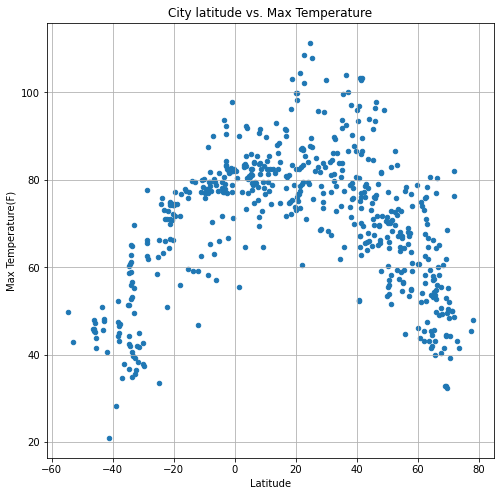

In [16]:
lat_temp.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

<AxesSubplot:title={'center':'City latitude vs. Humidity'}, xlabel='Lat', ylabel='Humidity'>

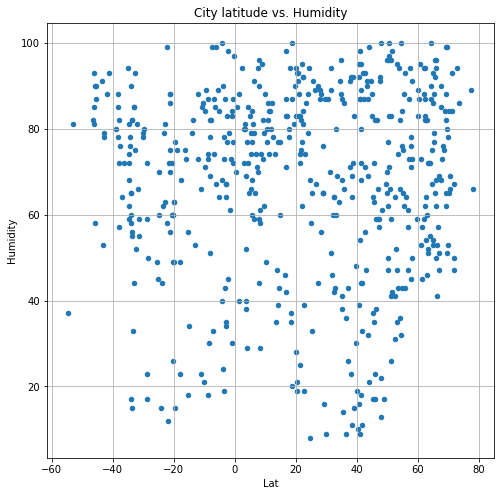

In [17]:
lat_humidity=clean_city_data[['Lat','Humidity']]
lat_humidity.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="City latitude vs. Humidity")

<AxesSubplot:title={'center':'City latitude vs. Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

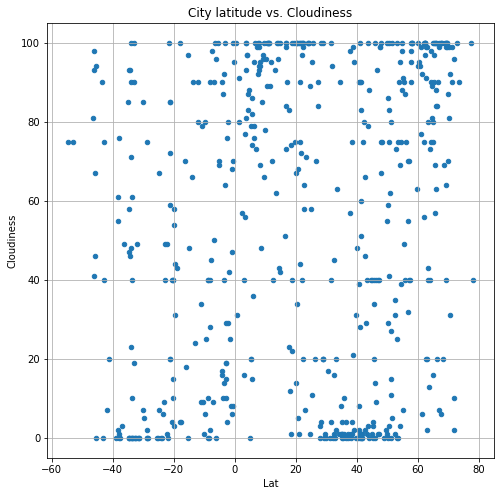

In [18]:
lat_cloud=clean_city_data[['Lat','Cloudiness']]
lat_cloud.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="City latitude vs. Cloudiness")

<AxesSubplot:title={'center':'City latitude vs. Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

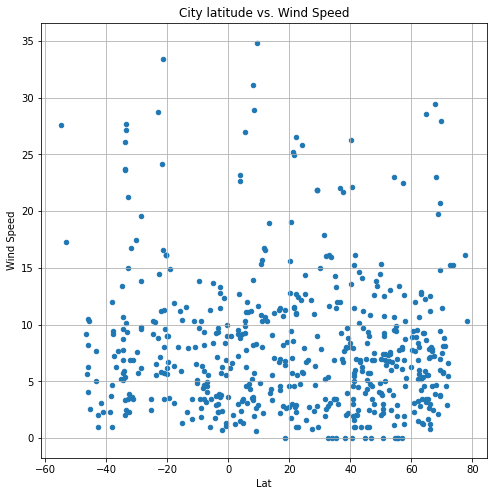

In [19]:
lat_wind=clean_city_data[['Lat','Wind Speed']]
lat_wind.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="City latitude vs. Wind Speed")

In [20]:
north=clean_city_data[clean_city_data['Lat']>0]
north_lat_cloud=north[['Lat','Cloudiness']]
north_lat_humid=north[['Lat','Humidity']]
north_lat_temp=north[['Lat','Max Temp']]
north_lat_wind=north[['Lat','Wind Speed']]
south=clean_city_data[clean_city_data['Lat']<0]
south_lat_cloud=south[['Lat','Cloudiness']]
south_lat_humid=south[['Lat','Humidity']]
south_lat_temp=south[['Lat','Max Temp']]
south_lat_wind=south[['Lat','Wind Speed']]

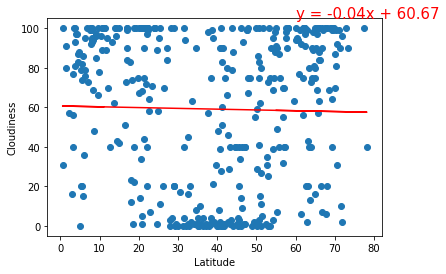

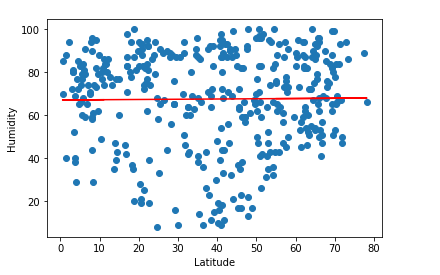

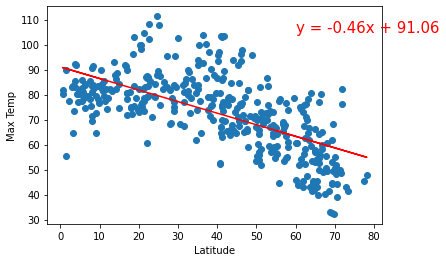

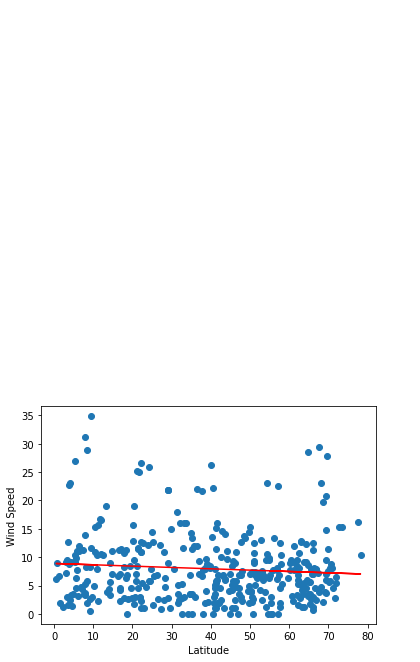

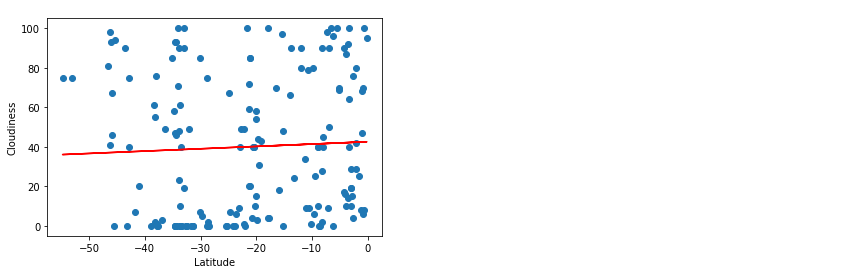

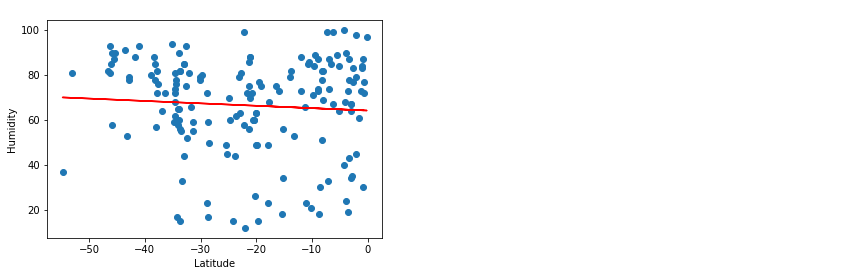

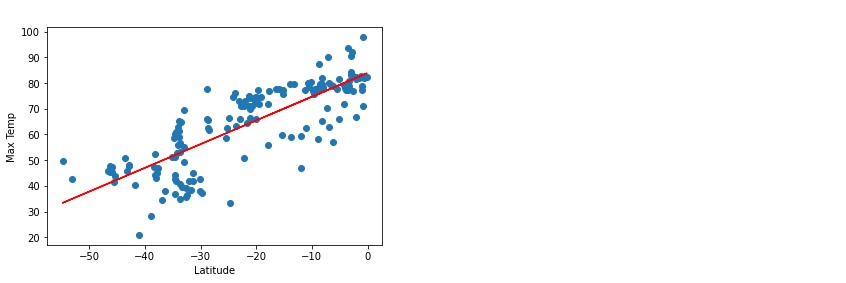

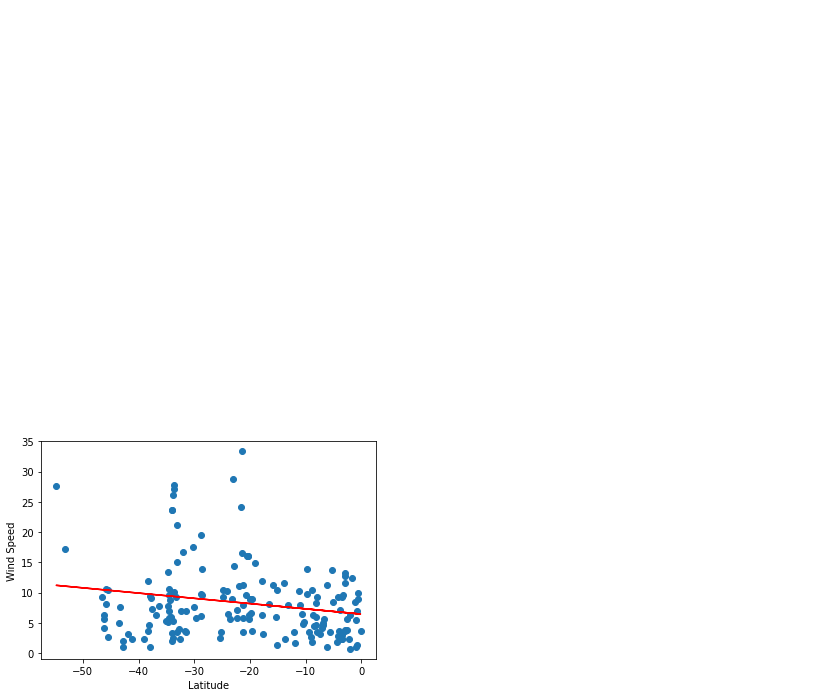

In [25]:
dict_df={'north':[north_lat_cloud,north_lat_humid,north_lat_temp,north_lat_wind],
         'south':[south_lat_cloud,south_lat_humid,south_lat_temp,south_lat_wind]}
options=['Cloudiness','Humidity','Max Temp','Wind Speed']


for key in dict_df.keys():
    for value in range(0,4):
        x_values=dict_df[key][value]['Lat']
        y_values=dict_df[key][value][options[value]]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(60,105),fontsize=15,color="red")
        plt.xlabel('Latitude')
        plt.ylabel(f'{options[value]}')
        plt.show()

In [ ]:
north_lat_temp=north[['Lat','Max Temp']]
x_values=north_lat_temp['Lat']
y_values=north_lat_temp['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()